In [1]:
import pandas as pd
import numpy as np
import sys, os, re
import matplotlib.pyplot as plt

# from importlib import reload

if re.match(r'^(\w\:\\)|(/)', os.getcwd()):
    # sys.path.insert(0, "c:/Users/dmitr/devs/quantl/")
    # sys.path.insert(0, "c:/Users/dmitr/devs/Qube/")
    sys.path.insert(0, "c:/Users/dmitr/devs/Qube2exp/src/")
    # sys.path.insert(0, "c:/Users/dmitr/devs/Qube2exp/tests/")
    sys.path.insert(0, "c:/Users/dmitr/devs/Qube2exp/")
    print('installed')


# just some handy helpers from old Qube
# from ta_helpers import kama, kama_indicator, apply_to_frame
import tests.qube.ta.utils_for_testing as test

%load_ext cython

T = pd.date_range('2024-01-01 00:00', freq='1Min', periods=100_000)
ds = 1 + (2*np.random.randn(len(T))).cumsum()
data = list(zip(T, ds))

installed
 > Reloaded c:\Users/dmitr/devs/Qube2exp/src\qube\core\series.pyx


## Cython v2 tests (cseries1)

In [53]:
%load_ext autoreload
%autoreload 2

from qube.utils import reload_pyx_module

reload_pyx_module('../../src/qube/core/')
from qube.core.series import TimeSeries
del sys.modules['qube.core.series']
from qube.core.series import (TimeSeries, sma, ema, tema, dema, kama, recognize_time, OHLCV, RollingSum, Sma, Ema, Cached)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
 > Reloaded ../../src/qube/core\series.pyx


## Series example

In [5]:
# %%timeit
ts = TimeSeries('test', '10Min')
ts.update(recognize_time('2024-01-01 00:00'), 1)
ts.update(recognize_time('2024-01-01 00:01'), 5)
ts.update(recognize_time('2024-01-01 00:06'), 2)
ts.update(recognize_time('2024-01-01 00:12'), 3)
ts.update(recognize_time('2024-01-01 00:21'), 4)
ts.update(recognize_time('2024-01-01 00:22'), 5)
ts.update(recognize_time('2024-01-01 00:31'), 6)
ts.update(recognize_time('2024-01-01 00:33'), 7)
ts.update(recognize_time('2024-01-01 00:45'), -12)
ts.update(recognize_time('2024-01-01 00:55'), 12)
ts.update(recognize_time('2024-01-01 01:00'), 12)

1

In [13]:
ts.to_series()

2024-01-01 00:00:00     2.0
2024-01-01 00:10:00     3.0
2024-01-01 00:20:00     5.0
2024-01-01 00:30:00     7.0
2024-01-01 00:40:00   -12.0
2024-01-01 00:50:00    12.0
2024-01-01 01:00:00    12.0
Name: test, dtype: float64

## <font color='orange'>WIP</font>

### Indicators tests

In [406]:
# %%timeit 
ts = TimeSeries('close', '1h')
s1 = sma(ts, 50)
e1 = ema(ts, 50)
ss1 = sma(s1, 50)
ee1 = ema(e1, 50)
t1 = tema(ts, 50)
k1 = kama(ts, 50)
d1 = dema(ts, 50)
test.push(ts, data)

In [403]:
k1s = k1.to_series().dropna()
ik1 = test.apply_to_frame(test.kama, ts.to_series(), 50).dropna()
sum(ik1 - k1.to_series().dropna()) < 1e-8

True

In [404]:
k1 = kama(ts, 50)
k1s = k1.to_series().dropna()
sum(ik1 - k1.to_series().dropna()) < 1e-8

True

In [ ]:
plt.plot(ts.to_series(), lw=0.5)
plt.plot(tema(ts, 50).to_series())
plt.plot(dema(ts, 50).to_series())
plt.plot(t1.to_series())

In [327]:
# %%timeit
x0 = ts.to_series()
pe1 = x0.ewm(span=50, min_periods=50).mean()
pee1 = pe1.ewm(span=50, min_periods=50).mean()
ps1 = x0.rolling(50).mean()
pss1 = ps1.rolling(50).mean()

In [ ]:
plt.plot(x0, lw=0.5)
plt.plot(s1.to_series()); plt.plot(ps1)
plt.plot(ss1.to_series()); plt.plot(pss1)
plt.plot(e1.to_series()); plt.plot(pe1)
plt.plot(ee1.to_series()); plt.plot(pee1)
# plt.plot(s1.to_series()-ps1)

In [355]:
# %%timeit
s1 = sma(ts, 50)
e1 = ema(ts, 50)
ss1 = sma(s1, 50)
ee1 = ema(e1, 50)
k1 = kama(e1, 50)

In [356]:
ts.get_indicators().clear()

{'sma(50)': <qube.core.series.sma at 0x209e2fdabc0>,
 'ema(50)': <qube.core.series.ema at 0x209e2899e00>}

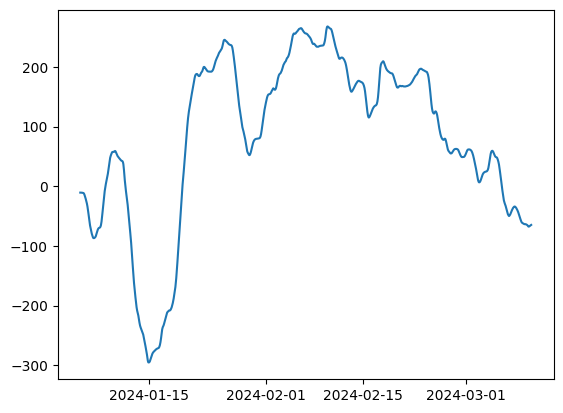

In [357]:
plt.plot(k1.to_series())

### Indicators wip ... 

In [358]:
ts0 = TimeSeries('close', '1Min')
# em0 = sma(ts0, 3)
# em1 = sma(em0, 3)
k0 = kama(ts0, 6)  

for t, v in [
    ('2024-01-01 00:00', 9), ('2024-01-01 00:00', 1),
    ('2024-01-01 00:01', 2), ('2024-01-01 00:01', 3),   ('2024-01-01 00:01', 2),
    ('2024-01-01 00:02', 3),
    ('2024-01-01 00:03', 4),
    ('2024-01-01 00:04', 5), ('2024-01-01 00:04', 5.1), ('2024-01-01 00:04:20', 5),
    ('2024-01-01 00:05', 6), ('2024-01-01 00:05', 7),   ('2024-01-01 00:05', 6),
    ('2024-01-01 00:07', 8), ('2024-01-01 00:07', -1),  ('2024-01-01 00:07', 8),
    ('2024-01-01 00:08', 8),
    ('2024-01-01 00:09', 8),
    ('2024-01-01 00:10', 12),
    ('2024-01-01 00:11', 13),
    ('2024-01-01 00:12', 14),
    ('2024-01-01 00:13', 15),
    ('2024-01-01 00:14', 17),
    ('2024-01-01 00:15', 4),
]:
    ts0.update(recognize_time(t), v)

In [359]:
k0.to_series()

2024-01-01 00:00:00          NaN
2024-01-01 00:01:00          NaN
2024-01-01 00:02:00          NaN
2024-01-01 00:03:00          NaN
2024-01-01 00:04:00          NaN
2024-01-01 00:05:00     6.000000
2024-01-01 00:07:00     6.888889
2024-01-01 00:08:00     7.382716
2024-01-01 00:09:00     7.657064
2024-01-01 00:10:00     9.587258
2024-01-01 00:11:00    11.104032
2024-01-01 00:12:00    12.391129
2024-01-01 00:13:00    13.550627
2024-01-01 00:14:00    15.083682
2024-01-01 00:15:00    14.748120
Name: kama(6,2,30), dtype: float64

### Caching indicators

In [54]:
ts = TimeSeries('close', '1h')
test.push(ts, data)

In [55]:
sma(ts, 10).to_series()

2024-01-01 00:00:00           NaN
2024-01-01 01:00:00           NaN
2024-01-01 02:00:00           NaN
2024-01-01 03:00:00           NaN
2024-01-01 04:00:00           NaN
                          ...    
2024-03-10 06:00:00    635.948320
2024-03-10 07:00:00    634.558595
2024-03-10 08:00:00    634.599720
2024-03-10 09:00:00    634.414935
2024-03-10 10:00:00    634.240072
Name: sma(10), Length: 1667, dtype: float64

In [62]:
ema(ts, 10).to_series()
ema(ts, 50).to_series()
tema(ts, 50).to_series()
dema(ts, 50).to_series()

2024-01-01 00:00:00          NaN
2024-01-01 01:00:00          NaN
2024-01-01 02:00:00          NaN
2024-01-01 03:00:00          NaN
2024-01-01 04:00:00          NaN
                         ...    
2024-03-10 06:00:00    19.967149
2024-03-10 07:00:00    19.865463
2024-03-10 08:00:00    19.491906
2024-03-10 09:00:00    19.044843
2024-03-10 10:00:00    18.456159
Length: 1667, dtype: float64

In [63]:
ts.get_indicators()

{'sma(10)': <qube.core.series.sma at 0x1e30c9849c0>,
 'ema(10,1)': <qube.core.series.ema at 0x1e30c5b0040>,
 'ema(50,1)': <qube.core.series.ema at 0x1e30c5b0680>,
 'tema(50,1)': <qube.core.series.tema at 0x1e30d097680>,
 'dema(50,1)': <qube.core.series.dema at 0x1e3096d3160>}

### OHLC tests

In [367]:
ohlc = OHLCV('1Min')
s1 = sma(ohlc.close, 10)
for t, v in [
    ('2024-01-01 00:00', 9), ('2024-01-01 00:00', 1),
    ('2024-01-01 00:01', 2), ('2024-01-01 00:01', 3),   ('2024-01-01 00:01', 2),
    ('2024-01-01 00:02', 3),
    ('2024-01-01 00:03', 4),
    ('2024-01-01 00:04', 5), ('2024-01-01 00:04', 5.1), ('2024-01-01 00:04:20', 5),
    ('2024-01-01 00:05', 6), ('2024-01-01 00:05', 7),   ('2024-01-01 00:05', 6),
    ('2024-01-01 00:07', 8), ('2024-01-01 00:07', -1),  ('2024-01-01 00:07', 8),
    ('2024-01-01 00:08', 8),
    ('2024-01-01 00:09', 8),
    ('2024-01-01 00:10', 12), ('2024-01-01 00:10:01', 21),('2024-01-01 00:10:30', 1),('2024-01-01 00:10:31', 5),
    ('2024-01-01 00:11', 13),
    ('2024-01-01 00:12', 14),
    ('2024-01-01 00:13', 15),
    ('2024-01-01 00:14', 17),
    ('2024-01-01 00:15', 4), ('2024-01-01 00:15:10', 12),
]:
    ohlc.update(recognize_time(t), v, 1)

In [369]:
r1 = RollingSum(3)

In [381]:
r1.update(1, 1); print(r1)
# r1.update(1, 1); print(r1)
# r1.update(1, 0); print(r1)

rs[3] = [1. 1. 1.] @ 0 -> 0


In [ ]:
ohlc.to_series()

In [385]:
print(str(ohlc), str(s1))

OHLCV[1Min] | 15 records
  2024-01-01T00:15:00.000000000 {o:4.000000 | h:12.000000 | l:4.000000 | c:12.000000 | v:2.000000}
  2024-01-01T00:14:00.000000000 {o:17.000000 | h:17.000000 | l:17.000000 | c:17.000000 | v:1.000000}
  2024-01-01T00:13:00.000000000 {o:15.000000 | h:15.000000 | l:15.000000 | c:15.000000 | v:1.000000}
   .......... 
  2024-01-01T00:02:00.000000000 {o:3.000000 | h:3.000000 | l:3.000000 | c:3.000000 | v:1.000000}
  2024-01-01T00:01:00.000000000 {o:2.000000 | h:3.000000 | l:2.000000 | c:2.000000 | v:3.000000}
  2024-01-01T00:00:00.000000000 {o:9.000000 | h:9.000000 | l:1.000000 | c:1.000000 | v:2.000000}
 sma(10)[1Min] | 15 records
  2024-01-01T00:15:00.000000000 10.6
  2024-01-01T00:14:00.000000000 9.9
  2024-01-01T00:13:00.000000000 8.6
   .......... 
  2024-01-01T00:02:00.000000000 nan
  2024-01-01T00:01:00.000000000 nan
  2024-01-01T00:00:00.000000000 nan



In [386]:
s1.to_series()

2024-01-01 00:00:00     NaN
2024-01-01 00:01:00     NaN
2024-01-01 00:02:00     NaN
2024-01-01 00:03:00     NaN
2024-01-01 00:04:00     NaN
2024-01-01 00:05:00     NaN
2024-01-01 00:07:00     NaN
2024-01-01 00:08:00     NaN
2024-01-01 00:09:00     NaN
2024-01-01 00:10:00     NaN
2024-01-01 00:11:00     6.2
2024-01-01 00:12:00     7.4
2024-01-01 00:13:00     8.6
2024-01-01 00:14:00     9.9
2024-01-01 00:15:00    10.6
Name: sma(10), dtype: float64

In [388]:
sma(ohlc.close, 10).to_series()

2024-01-01 00:00:00     NaN
2024-01-01 00:01:00     NaN
2024-01-01 00:02:00     NaN
2024-01-01 00:03:00     NaN
2024-01-01 00:04:00     NaN
2024-01-01 00:05:00     NaN
2024-01-01 00:07:00     NaN
2024-01-01 00:08:00     NaN
2024-01-01 00:09:00     NaN
2024-01-01 00:10:00     5.0
2024-01-01 00:11:00     6.2
2024-01-01 00:12:00     7.4
2024-01-01 00:13:00     8.6
2024-01-01 00:14:00     9.9
2024-01-01 00:15:00    10.6
Name: sma(10), dtype: float64

In [389]:
sma(ohlc.close, 8).to_series()

2024-01-01 00:00:00       NaN
2024-01-01 00:01:00       NaN
2024-01-01 00:02:00       NaN
2024-01-01 00:03:00       NaN
2024-01-01 00:04:00       NaN
2024-01-01 00:05:00       NaN
2024-01-01 00:07:00       NaN
2024-01-01 00:08:00     4.625
2024-01-01 00:09:00     5.500
2024-01-01 00:10:00     5.875
2024-01-01 00:11:00     7.125
2024-01-01 00:12:00     8.375
2024-01-01 00:13:00     9.625
2024-01-01 00:14:00    11.000
2024-01-01 00:15:00    11.500
Name: sma(8), dtype: float64